# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2023/)    
## 1MS041, 2023 
&copy;2023 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# Standard error simulations

## Balance scale problem

With the help of a balance scale we have measured the weights of two items with true weights $m_1,m_2$. We have measured $m_1,m_2,m_1-m_2,m_1+m_2$. Whenever we measure we make a measurement error with standard deviation $\sigma$. $X_1,X_2,X_3,X_4$ are the four measurements

* We can use $X_1$ as an estimate for $m_1$
* We could also use $(X_1-X_2+X_4)/2$ as an estimate for $m_1$
* To estimate $m_1$ we could use $(X_3+X_4)/2$.
* To estimate $m_1$ we could also use $(X_1+X_2+X_3)/2$

In [2]:
import numpy as np
def experiment():
    m1 = 25
    m2 = 16

    err = np.random.normal(size=4)
    X1 = m1+err[0]
    X2 = m2+err[1]
    X3 = m1-m2+err[2]
    X4 = m1+m2+err[3]

    theta1 = X1
    theta2 = (X1-X2+X4)/2
    theta3 = (X3 + X4)/2
    theta4 = (X1 + X2 + X3)/2

    return (theta1,theta2,theta3,theta4)

In [11]:
experiments = np.array([experiment() for i in range(10000)])

In [12]:
experiments.shape

(10000, 4)

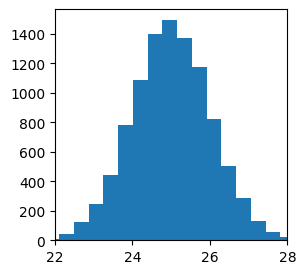

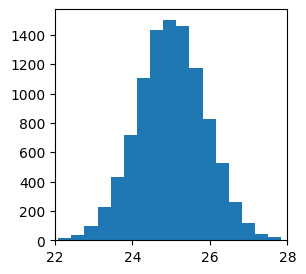

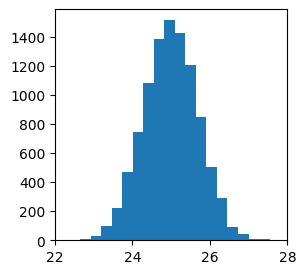

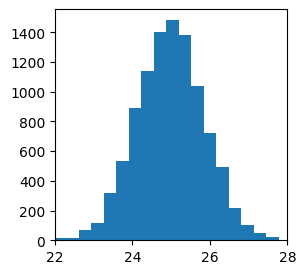

In [14]:
import matplotlib.pyplot as plt
for i in range(experiments.shape[1]):
    plt.figure(figsize=(3,3))
    _=plt.hist(experiments[:,i],bins=20)
    plt.xlim(22,28)
    plt.show()

* $Var[X_1] = Var(X_1)$
* $Var[(X_1-X_2+X_4)/2] =3/4 * Var(X_1)$ 

* $ Var[(X_3+X_4)/2] = 1/2 * Var(X_1)$
* $ Var[(X_1+X_2+X_3)/2] = 3/4 * Var(X_1)$

In [6]:
np.var(experiments,axis=0)
#

array([1.01966029, 0.76271595, 0.50822996, 0.74890802])

## Reliability of parallel systems

A reliability system consists of two parallell circuits which break independently of each other and has the probabilities $p_1$ and $p_2$ to break during a week. The weekwise probability that the system breaks is thus $p_1p_2$. We now test $n$ such systems and find that the first circuit breaks $x_1$ times and the second system breaks $x_2$ times and that the full system has broken down $x$ times. Two estimators for $p_1p_2$ has been proposed.
\begin{align*}
    p^\ast &:= \frac{x}{n} \\
    \hat p &:= \frac{x_1}{n}\frac{x_2}{n}
\end{align*}
Show that they are unbiased and compute the corresponding variances.

In [15]:
import numpy as np
def experiment(n=100):
    p1 = 0.1
    p2 = 0.3

    X1 = np.random.binomial(1,p1,size=n)
    X2 = np.random.binomial(1,p2,size=n)

    past = np.mean(X1*X2)
    phat = np.mean(X1)*np.mean(X2)
    return (past,phat)

In [16]:
experiments = np.array([experiment() for i in range(1000)])

In [17]:
true_value = 0.1*0.3
true_value

0.03

In [21]:
np.mean(experiments,axis=0)

array([0.03052  , 0.0307957])

In [19]:
np.std(experiments,axis=0)

array([0.01748513, 0.01070658])

## Sample Proportion

https://medium.com/statistical-guess/sample-proportion-f3ab4bae718a

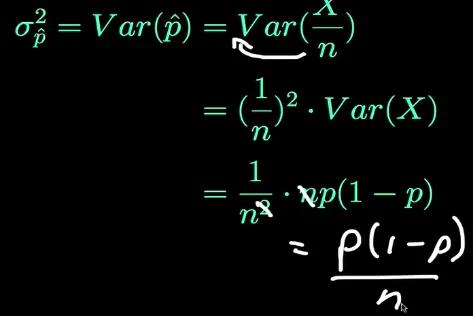

In [36]:
p_star=0.1*0.3
var_p_star=p_star*(1-p_star)/100 # var(p_hat)=p*(1-p)/n
np.sqrt(var_p_star)

0.01705872210923198

In [44]:
n=100
var_x1=0.1*(1-0.1)/100
var_x2=0.3*(1-0.3)/100
mean_x1=0.1
mean_x2=0.3

var_p_hat=(var_x1)**2*(var_x2)**2+var_x1*mean_x1**2+var_x2*mean_x2**2
np.sqrt(var_p_hat)

0.014071247406399335